# Decision Trees

## In this Lesson
* What is a Decision Tree?
* The Titanic Problem
* How Does A Decision Tree Work?
* Entropy
* Decision Tree Algorithms


# What is a Decsion Tree?

A decision tree is a common **Machine Learning** algorithm you will ecounter as a Data Scientist.

In contrast to regression models, decsion trees are used to solve **classification** problems.

## Regression

Regression machine learning is used to solve continuous numeric problems, such as how long will this joruney take, or how much profit can we expect to make?

Additional information on linear regression is available in [my other lession](https://github.com/Jack-Lawton/python-resources/blob/main/lessons/Regression.ipynb).

## Classification

Classification machine learning is used to solve discreet, categorisation type problems. For example, what type of animal is this, or will a student answer a question correctly?

In this lesson we will be using a popular classification problem dataset available from Kaggle : [The Titanic Problem](https://www.kaggle.com/c/titanic).

# Titanic

When The Titanic sank in 1912, there was available a full list of all passengers on-board. Only some of the passengers survived the sinking, this data is also available. The Titanic machine learning problem is to use information available about the passengers to predict if they would survive or not.

While this data is available directly from Kaggle, I have also included it in this git repo for convenience.

In [2]:

# Pandas to read data
import pandas as pd

# Display function to view data (jupyter notebooks only)
from IPython.display import display

df = pd.read_csv("../data/Titanic training.csv")

# Display
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C



As you can see, there are several columns of information regarding 891 passengers on The Titanic, as well as our target variable, *Survived*.

We can use a decision tree classification model to predict the value of *Survived*.


In [3]:

# Import matplotlib for visualisation
import matplotlib.pyplot as plt

# Import a generic decision tree classifier from Sci-Kit Learn
from sklearn.tree import DecisionTreeClassifier
# Ref
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Import function to score model accuracy
from sklearn.metrics import accuracy_score

# Cleaning
df["Age"] = df["Age"].fillna(-1)

# Generate features
df["is_male"] = df["Sex"] == "male"

# Split the data frame into a train and test set
df_train = df[:500]
df_test = df[500:]

# Define what features we want to use
features = ["is_male", "Age", "Pclass", "Fare"]
target = "Survived"

# Create an instance of the decsion tree
clf = DecisionTreeClassifier(max_depth=3)

# Fit decision tree
clf.fit(df_train[features], df_train[target])

# Save predictions
preds = clf.predict(df_test[features])

# Assess model accuracy
decision_tree_accuracy = accuracy_score(df_test[target], preds) * 100
print(f"Accuracy: {decision_tree_accuracy:.1f}%")


Accuracy: 80.3%


80% accuracy is very encouraging for a simple model, to understand how the decision tree we can plot a visualisation of the tree branches...

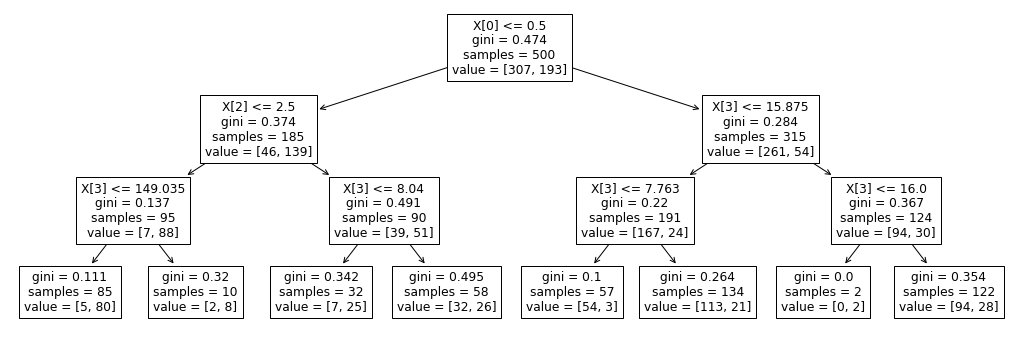

In [4]:

# Function to plot decision trees
from sklearn.tree import plot_tree

# Plot decision tree
fig, ax = plt.subplots(figsize=(18, 6))
plot_tree(clf)
plt.show()


In the above visual, we can see the process the decsion tree has followed to asses if each passenger is expected to survive or not. Each box represents a branching decision point, used to narrow down the data. Each split is based on the condition which best separates passengers who survived, from passengers who did not.

For example, considering the first box, the split condition is `X[0] <= 0.5`, i.e. our first parameter, in this case is_male must be less than or equal to a half. Because is_male can only be 1 or 0, this essentially equates to "is the passenger male or female?". We know from historical accounts of The Titanic that women were given priority on life boats, so logically, this makes sense as the most important split.

For exploring decision trees, I would also recomend you take a look at [OrangeML](https://orangedatamining.com/), Orange is a great tool for trying out different machine learning techniques and generating interactive visualisations.

The decision tree visualisation in Orange is highly effective at displaying model logic through colour coding. Often, just understanding how a decision tree might break down a data set can be more valuable than deploying it as an acutal predicitve model.

<img align="center" width="70%" src="../images/orange_titanic_decision_tree.png">

The above decision tree is genarated using the exact same data in OrangeML, as you can see, the tree is identical to the Sci-Kit Learn visulisation. OrangeML uses python libraries under the hood!


# How Does a Decision Tree Work?

A decision tree needs to choose which split would best separate the data at any point, and then proceed iteratively until all branches are complete. The value of any given split can be calulated using [Entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)).

## Entropy

Entropy is a measure of disorder. In physics, we say for an isolated system, the entropy can only increase. The classic example is a teenager’s bedroom, it can only get messier, unless, we put in external work to tidy it – and therefore reduce the entropy. The same is true in data science, our data set, like the teenager’s room, will initially be messy: the titanic data contains a mixture of passengers who both did and did not survive, by sorting these into defined categories, we will reduce the entropy.

Mathematically, we define entropy, $S$ (in information theory) as:

$S = -\underset{x\in\mathcal{X}}\sum p(x)\log p(x)$

Where $\mathcal{X}$ is a set of possible values, $x$. And $p(x)$ is the probability of finding an object with value $x$.

As an example, consider a bag of blue and red marbles, $\mathcal{X}$ contains two possible values, red or blue.

<p><img align="left" width="25%" src="../images/DALL·E_marbles.png"></p><br>
The entropy of this bag would be,

$S = -p(\text{blue})\log p(\text{blue}) - p(\text{red})\log p(\text{red}) $

Say the bag contains 6 blue marbles and 4 red marbles, the probability of randomly drawing a blue marble would be 60%, and 40% for a red marble. Hence, entropy can be quantified as:

$S = -0.6\log0.6 - 0.4\log0.4 = 0.673$

Note, here I have used a natural logarithm, any base is acceptable so long as we are consistent. This is because comparisons between different entropies are important, not the exact value. See [Wikipedia](https://en.wikipedia.org/wiki/Entropy_(information_theory)) for more information.


Consider if the bag only contained blue marbles,

$S = -1\log1 = 0$

Here, entropy is zero, showing a perfectly ordered system minimised entropy.


## Entropy of a System

We want to be able to measure the change in entropy in a system to see if what we are doing to sort the data is working. Imagine, we split our bag of red and blue marbles between two different bags. We need to be able to understand the combined entropy of those two bags to compare to the initial entropy where the marbles were mixed.

The entropy of a system is simply the weighted average of each of the categories within it, i.e.

$S_\text{system} = \underset{c}\sum \frac{n_c}{N}S_c$

Where $c$ represents each category, $n_c$ the number of records in each category, $N$ the total number of records in the system and $S_c$ is the entropy of each individual category.

For example, if we sorted the bag of ten marbles into two bags, one with 4 blue marbles and 1 red marble,

$S_A = -0.8\log0.8 - 0.2\log0.2 = 0.5$

and another with 2 blue marbles and 3 red marbles,

$S_B = -0.4\log0.4 - 0.6\log0.6 = 0.673$

The overall system entropy would be:

$S_\text{system} = \frac{5}{10}0.5 + \frac{5}{10}0.673 = 0.587 $

Meaning, the overall entropy for the system has decreased, hence the split was a good one (assuming our end goal is to have one bag of only blue marbles and one bag of only red marbles).

## Exercise: Implement Entropy Functions in Python

Implement two functions, one to return the entropy of a list and the other to return the entropy of a system (a list of lists)

## Solution

In [5]:

import math

def entropy(iterable):
    values = set(iterable)
    size = len(iterable)
    p_values = [len(list(filter(lambda x: x == v, iterable)))/size for v in values]
    return - sum([p * math.log(p) for p in p_values])


def entropy_system(*args):
    sizes = [len(x) for x in args]
    total = sum(sizes)
    return sum([(len(x)/total)*entropy(x) for x in args])


## In Conclusion

Recall how decision trees work.

<img align="center" width="70%" src="../images/orange_titanic_decision_tree.png">

Each split in the decision tree represents the best split which can be made to separate the categories - i.e. the split which maximises the reduction in entropy for the system.

# Decision Tree Algorithms in Python

Considering the Titanic dataset, we are trying to predict `Survived`, available to us there are three categorical variables, `Pclass`, `Sex` and `Embarked`.

In [6]:
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-1.0,1,2,W./C. 6607,23.4500,NaN,S,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,True


## Exercise: Determine The Best Split

Write some python code to determine from the categories, `Pclass`, `Sex` and `Embarked`, which category and value is the best to split on - i.e. reduces  the entropy the most.

Tip: make use of the `entropy()` and `entropy_system()` functions.

## Solution

In [7]:

def choose_best_split(df, target, features):
    base_entropy = entropy(df[target])

    split_options = []
    for feature in features:
        values = set(df[feature])
        split_options += [(feature, value) for value in values]

    entropies = {
        (feature, value): base_entropy - entropy_system(
            df[df[feature] == value][target],
            df[df[feature] != value][target]
        )
        for feature, value in split_options
    }

    # Sort by value
    return max(entropies.items(), key=lambda item: item[1])


print(choose_best_split(df, "Survived", ["Pclass", "Sex", "Embarked"]))


(('Sex', 'male'), 0.15087048925218172)



## Continuous Variables

The logic here for categorical variables is relatively straight forwards as we can just test splitting on each category, however, for continuous/numeric variables such as `Age` and `Fare` we need to choose a value to split on based on a greater/less than condition. This is more complex.

... tbc


In [45]:

# Import Scipy minimization function
from scipy.optimize import minimize

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html


# Function to identify the best split point
def best_entropy_split_for_numeric(df, target, feature):
    
    # Optimise to minimise system entropy
    def new_system_entropy(value):
        return entropy_system(
            df[df[feature] > value[0]][target],
            df[df[feature] <= value[0]][target]
        )
    
    # Use minimisation function
    result = minimize(
        new_system_entropy, [df[feature].mean()], 
        bounds=[(df[feature].min(), df[feature].max())], 
        method="Powell"
    ).x[0]
    # Done
    return result

print(best_entropy_split_for_numeric(df, "Survived", "Fare"))



74.19290294980456


512.3292
0.0
0.6294063979849942


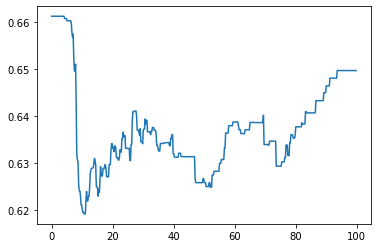

In [47]:

x = []
y = []

for i in range(0, 500, 1):
    x.append(i/5)
    y.append(entropy_system(
            df[df["Fare"] > i/5]["Survived"],
            df[df["Fare"] <= i/5]["Survived"]
        ))
    
plt.plot(x,y)
plt.show()
